In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob

import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.neural_network
from sklearn.metrics import confusion_matrix

In [2]:
def read(path_folder):
    folder = []
    for f in glob.iglob(path_folder+"/*"):
        folder.append(f[len(path_folder):]+"/")
    folder = np.array(folder)
    x = []
    y = []
    for i in folder:
        files = np.array(glob.glob(path_folder+i+"/*.png"))
        for j in files:
            img = np.array(plt.imread(j)).astype(float)
            shape = np.shape(img)
            x.append(img.flatten())
            y.append(i[:-1])
    return np.array(x), np.array(y), len(folder), shape

In [3]:
folder = "../Datasets/places"
path_folder = "./"+folder+"-raw/"
X, Y, K, shape = read(path_folder)

In [4]:
print(X.shape)
print(Y.shape)
print(K)
print(shape)

(3000, 289)
(3000,)
6
(17, 17)


In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

scaler = sklearn.preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
def NN(X_train,X_test,activation='logistic', skl=(4,4,4), it=5000):
    N = np.linspace(0.1,1,10)
    F1_train = np.zeros(len(N))
    F1_test = np.zeros(len(N))

    for i, n in enumerate(N):
        X_tr = X_train[:int(X_train.shape[0]*n)]
        y_tr = y_train[:int(y_train.shape[0]*n)]
        X_ts = X_test[:int(X_test.shape[0]*n)]
        y_ts = y_test[:int(y_test.shape[0]*n)]

        mlp = sklearn.neural_network.MLPClassifier(activation=activation, hidden_layer_sizes = skl, max_iter=it)
        mlp.fit(X_tr, y_tr)

        F1_test[i] = sklearn.metrics.f1_score(y_ts, mlp.predict(X_ts), average='macro')
        F1_train[i] = sklearn.metrics.f1_score(y_tr, mlp.predict(X_tr), average='macro')

    return N, F1_train, F1_test

/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/p

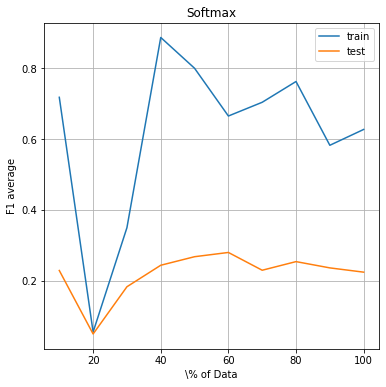

In [7]:
N, F1_train, F1_test = NN(X_train,X_test, activation='logistic')
fig = plt.figure(figsize=(6,6))
plt.plot(N*100,F1_train,label="train")
plt.plot(N*100,F1_test,label="test")
plt.xlabel("\% of Data")
plt.ylabel("F1 average")
plt.title("Softmax")
plt.grid()
plt.legend()
plt.show()

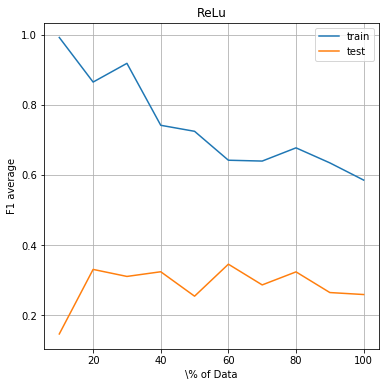

In [8]:
N, F1_train, F1_test = NN(X_train,X_test, activation='relu')
fig = plt.figure(figsize=(6,6))
plt.plot(N*100,F1_train,label="train")
plt.plot(N*100,F1_test,label="test")
plt.xlabel("\% of Data")
plt.ylabel("F1 average")
plt.title("ReLu")
plt.grid()
plt.legend()
plt.show()

## Anotaciones
Comparando ambos modelos para la activación softmax no existe una tendencia clara entre las curvas de train y test, lo mismo ocurre para la activación ReLU, sin embargo el F1 es test es más alto cuando la activación es ReLu que para cuando se utiliza softmax.

Tambén válido notar que para la función de activación ReLu no aparecen los Warning relacionados con el F1 score, esto debe ser por la forma de la función y sus derivadas.

In [9]:
Alpha = np.logspace(-6,2,10)
F1_train = np.zeros(len(Alpha))
F1_test = np.zeros(len(Alpha))

for i, a in enumerate(Alpha):
    mlp = sklearn.neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=(10,10,10), max_iter=5000, alpha=a)
    mlp.fit(X_train, y_train)

    F1_test[i] = sklearn.metrics.f1_score(y_test, mlp.predict(X_test), average='macro')
    F1_train[i] = sklearn.metrics.f1_score(y_train, mlp.predict(X_train), average='macro')


/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/debian/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


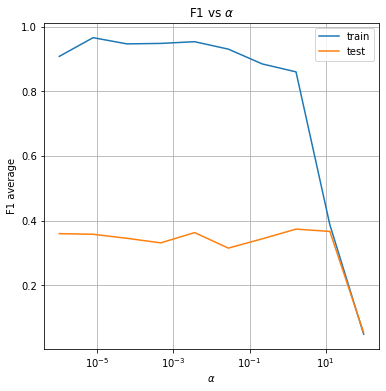

In [10]:
fig = plt.figure(figsize=(6,6))
plt.plot(Alpha,F1_train,label="train")
plt.plot(Alpha,F1_test,label="test")
plt.xlabel(r'$\alpha$')
plt.ylabel("F1 average")
plt.title(r'F1 vs $\alpha$')
plt.grid()
plt.xscale('log')
plt.legend()
plt.show()

## Variación del factor de regularización $\alpha$

Como se logra ver en la gráfica anterior el factor de regularización tiene un efecto positivo hasta una escala de 10^1, se logra ver que para este orden se logra el máximo score en F1.

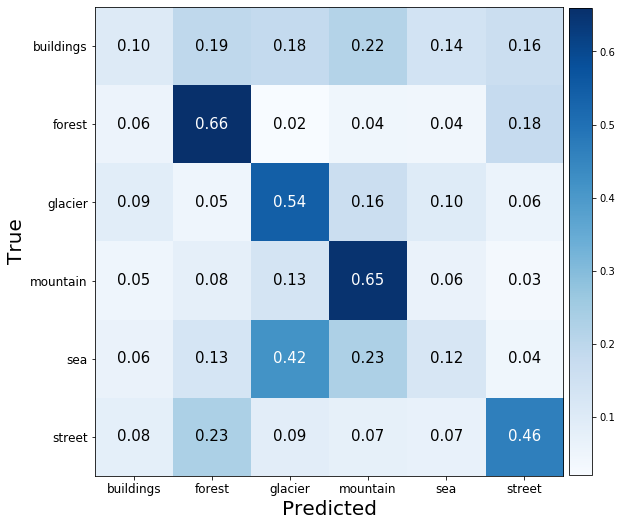

In [11]:
mlp = sklearn.neural_network.MLPClassifier(activation='relu', hidden_layer_sizes=(10,10,10), max_iter=5000, alpha=10)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
fig = plt.figure(figsize=(10, 10))
cm = confusion_matrix(y_test, y_pred)
classes = np.unique(y_train)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cmap=plt.cm.Blues
ax = fig.add_subplot(1,1,1)
im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
ax.figure.colorbar(im, ax=ax, pad=0.01, shrink=0.86)
ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]),xticklabels=classes, yticklabels=classes)
ax.set_xlabel("Predicted",size=20)
ax.set_ylabel("True",size=20)
ax.set_ylim(K-0.5, -0.5)

plt.setp(ax.get_xticklabels(), size=12)
plt.setp(ax.get_yticklabels(), size=12)

fmt = '.2f'
thresh = cm.max()/2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),ha="center", va="center",size=15 , color="white" if cm[i, j] > thresh else "black")